In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\ritik\OneDrive\Desktop\Prodigy\Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
X=df.iloc[:,[3,4]].values

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

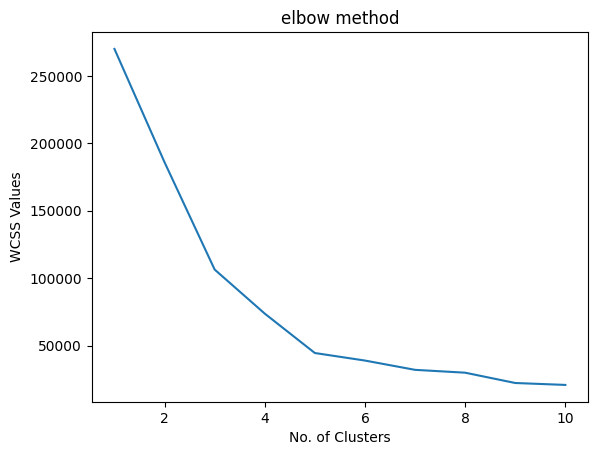

In [12]:
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS Values")
plt.show()

In [13]:
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [14]:
y_kmeans=kmeansmodel.fit_predict(X)

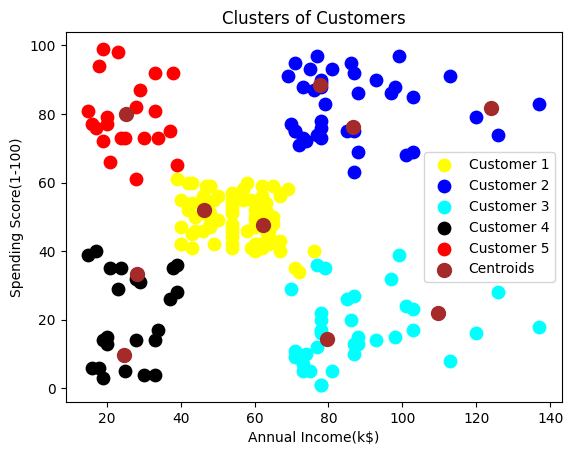

In [17]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c="yellow",label='Customer 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c="blue",label='Customer 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c="cyan",label='Customer 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=80,c="black",label='Customer 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=80,c="red",label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='brown',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()